## PROJECT REVIEW

This project aims to create a Python script that utilizes machine learning to recommend next-period prices for a firm that maximizes total profits.


## Business Objective

Create a Python algorithm to recommend next-period prices that maximize total firm profits.

In [1]:
# Importing the neccesary libraries
import numpy as np
import scipy as sp
import pandas as pd
import math

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

C:\Users\Dennis\anaconda3\envs\learn-env\lib\site-packages\scipy\__init__.py:173: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read the dataset
df = pd.read_csv('output_data.csv')
df

,mkt_id,output_date,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales
0,44,01jan2019,7.05,5.90,7.11,15.065000,42.80,0.515267,13.10
1,44,02jan2019,7.05,6.05,7.11,24.310000,36.14,0.557082,24.31
2,44,03jan2019,7.05,5.98,7.28,30.783910,34.34,0.579922,28.77
3,44,04jan2019,7.05,5.98,7.28,20.169500,36.32,0.542767,18.85
4,44,05jan2019,6.79,6.07,6.68,1.231200,44.06,0.494757,1.71
...,...,...,...,...,...,...,...,...,...
19705,15555,27dec2019,7.28,5.96,7.30,26.070000,36.68,0.515118,19.75
19706,15555,28dec2019,6.69,5.94,6.64,3.720000,34.34,0.497312,4.96
19707,15555,29dec2019,6.69,5.91,6.64,3.393001,32.00,0.424593,4.35
19708,15555,30dec2019,7.31,5.99,7.42,31.561200,31.10,0.465712,23.91


In [3]:
df.columns

Index(['mkt_id', 'output_date', 'output_own_price', 'output_own_cost',
       'output_comp_price', 'output_own_profits', 'output_X',
       'output_own_share', 'output_own_sales'],
      dtype='object')

In [4]:
df.sample(10)

,mkt_id,output_date,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales
17349,7403,14jul2019,6.69,6.00,6.71,0.172500,66.20,0.558849,0.25
14586,7341,18dec2019,7.07,6.06,7.12,16.402400,44.78,0.718643,16.24
5822,2700,14dec2019,6.69,5.96,6.73,1.518400,36.68,0.317679,2.08
5323,2485,02aug2019,7.00,5.99,6.99,1.151400,74.48,0.531992,1.14
18084,7432,19jul2019,7.10,5.96,7.00,0.604200,80.06,0.484727,0.53
11991,7075,08nov2019,7.10,6.04,7.14,10.865000,43.70,0.479143,10.25
15641,7374,08nov2019,7.07,5.97,7.14,18.975010,42.62,0.567252,17.25
8793,5100,03feb2019,6.75,6.07,6.81,3.597199,34.70,0.597315,5.29
14568,7341,30nov2019,6.69,5.96,6.64,2.299500,40.28,0.613674,3.15
19150,15000,20jun2019,7.07,5.97,6.99,1.166000,67.82,0.396493,1.06


In [5]:
df.shape

(19710, 9)

In [6]:
df['mkt_id'].nunique()

54

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19710 entries, 0 to 19709
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mkt_id              19710 non-null  int64  
 1   output_date         19710 non-null  object 
 2   output_own_price    19710 non-null  float64
 3   output_own_cost     19710 non-null  float64
 4   output_comp_price   19710 non-null  float64
 5   output_own_profits  19710 non-null  float64
 6   output_X            19710 non-null  float64
 7   output_own_share    19710 non-null  float64
 8   output_own_sales    19710 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.4+ MB


In [8]:
df.describe()

,mkt_id,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales
count,19710.000000,19710.000000,19710.000000,19710.000000,19710.000000,19710.000000,19710.000000,19710.000000
mean,5229.240741,7.002018,5.999675,7.003128,8.477572,52.718559,0.499905,7.293428
std,3714.454255,0.202630,0.049680,0.200832,10.015517,14.910094,0.077973,7.854675
min,44.000000,6.560000,5.790000,6.560000,0.012600,24.620000,0.193445,0.020000
25%,2306.000000,6.780000,5.970000,6.790000,0.949400,39.740000,0.449883,1.060000
50%,5210.500000,7.040000,6.000000,7.040000,3.539900,51.440000,0.500003,3.800000
75%,7369.000000,7.150000,6.030000,7.150000,14.476825,64.940000,0.550166,12.490000
max,15555.000000,7.550000,6.230000,7.510000,53.029810,92.840000,0.800825,36.080000


In [9]:
# Check for missing values
df.isnull().sum()

mkt_id                0
output_date           0
output_own_price      0
output_own_cost       0
output_comp_price     0
output_own_profits    0
output_X              0
output_own_share      0
output_own_sales      0
dtype: int64

In [10]:
# Checking for duplicates
df.duplicated().sum()

0

We can see from the shape and number of unique values in mkt_id that some markets have been repeated.

In [11]:
# Convert output_date column into Datetime
df['output_date'] =pd.to_datetime(df['output_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19710 entries, 0 to 19709
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mkt_id              19710 non-null  int64         
 1   output_date         19710 non-null  datetime64[ns]
 2   output_own_price    19710 non-null  float64       
 3   output_own_cost     19710 non-null  float64       
 4   output_comp_price   19710 non-null  float64       
 5   output_own_profits  19710 non-null  float64       
 6   output_X            19710 non-null  float64       
 7   output_own_share    19710 non-null  float64       
 8   output_own_sales    19710 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 1.4 MB


In [12]:
df

,mkt_id,output_date,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales
0,44,2019-01-01,7.05,5.90,7.11,15.065000,42.80,0.515267,13.10
1,44,2019-01-02,7.05,6.05,7.11,24.310000,36.14,0.557082,24.31
2,44,2019-01-03,7.05,5.98,7.28,30.783910,34.34,0.579922,28.77
3,44,2019-01-04,7.05,5.98,7.28,20.169500,36.32,0.542767,18.85
4,44,2019-01-05,6.79,6.07,6.68,1.231200,44.06,0.494757,1.71
...,...,...,...,...,...,...,...,...,...
19705,15555,2019-12-27,7.28,5.96,7.30,26.070000,36.68,0.515118,19.75
19706,15555,2019-12-28,6.69,5.94,6.64,3.720000,34.34,0.497312,4.96
19707,15555,2019-12-29,6.69,5.91,6.64,3.393001,32.00,0.424593,4.35
19708,15555,2019-12-30,7.31,5.99,7.42,31.561200,31.10,0.465712,23.91


In [13]:
def feature_engineering(df):
    # Calculate price-cost margin
    df['price_cost_margin'] = df['output_own_price'] - df['output_own_cost']
    
    # Calculate price change difference
    df['price_change_difference'] = df['output_own_price'].diff()
    
    # You can add more features based on your domain knowledge and requirements
    
    return df

# Apply feature engineering to the dataset
df = feature_engineering(df)

# Display the updated DataFrame with new features
df.head()

,mkt_id,output_date,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales,price_cost_margin,price_change_difference
0,44,2019-01-01,7.05,5.90,7.11,15.06500,42.80,0.515267,13.10,1.15,NaN
1,44,2019-01-02,7.05,6.05,7.11,24.31000,36.14,0.557082,24.31,1.00,0.00
2,44,2019-01-03,7.05,5.98,7.28,30.78391,34.34,0.579922,28.77,1.07,0.00
3,44,2019-01-04,7.05,5.98,7.28,20.16950,36.32,0.542767,18.85,1.07,0.00
4,44,2019-01-05,6.79,6.07,6.68,1.23120,44.06,0.494757,1.71,0.72,-0.26


price_cost_margin: Represents the margin between the own price and the cost, which can be an important factor in pricing decisions.

price_change_difference: Represents the difference in prices between consecutive days, capturing the rate of change in prices.

In [14]:
# Convert Date column to time series and set it as the index
# Sort by date in descending order
df.sort_values(by='output_date', ascending=True, inplace=True)

# Set date column as the index
df.set_index('output_date', inplace=True)

# View the first 5 rows
df.head()

,mkt_id,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales,price_cost_margin,price_change_difference
output_date,,,,,,,,,,
2019-01-01,44,7.05,5.90,7.11,15.06500,42.80,0.515267,13.10,1.15,NaN
2019-01-01,5029,7.29,6.08,7.22,20.90880,40.10,0.510447,17.28,1.21,0.10
2019-01-01,4911,7.25,6.03,7.22,21.61839,39.92,0.490370,17.72,1.22,0.06
2019-01-01,4896,7.25,6.05,7.19,19.89600,40.64,0.481579,16.58,1.20,0.01
2019-01-01,4887,7.15,5.96,7.31,19.31370,36.32,0.437932,16.23,1.19,0.02


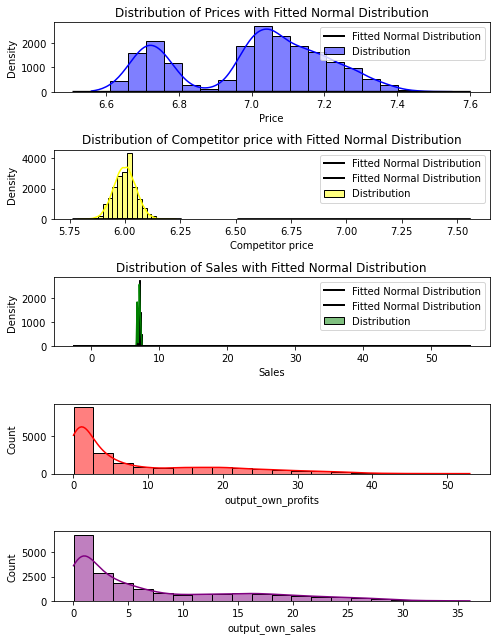

In [15]:
from scipy.stats import norm

fig, axes = plt.subplots(5, 1, figsize=(7, 9))

# Plot histogram for 'Price'
sns.histplot(df['output_own_price'], bins=20, kde=True, color='blue', label='Distribution', ax=axes[0])
mu_price, std_price = norm.fit(df['output_own_price'])
xmin_price, xmax_price = axes[0].get_xlim()
x_price = np.linspace(xmin_price, xmax_price, 100)
p_price = norm.pdf(x_price, mu_price, std_price)
axes[0].plot(x_price, p_price, 'k', linewidth=2, label='Fitted Normal Distribution')
axes[0].set_title('Distribution of Prices with Fitted Normal Distribution')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Density')
axes[0].legend()

# Plot histogram for 'cost'
sns.histplot(df['output_own_cost'], bins=20, kde=True, color='yellow', label='Distribution', ax=axes[1])
mu_cost, std_cost = norm.fit(df['output_own_cost'])
xmin_cost, xmax_cost = axes[1].get_xlim()
x_cost = np.linspace(xmin_cost, xmax_cost, 100)
p_cost = norm.pdf(x_cost, mu_cost, std_cost)
axes[1].plot(x_cost, p_cost, 'k', linewidth=2, label='Fitted Normal Distribution')
axes[1].set_title('Distribution of Cost with Fitted Normal Distribution')
axes[1].set_xlabel('Cost')
axes[1].set_ylabel('Density')
axes[1].legend()

# Plot histogram for 'competitor price'
sns.histplot(df['output_comp_price'], bins=20, kde=True, color='green', label='Distribution', ax=axes[2])
mu_comp_price, std_comp_price = norm.fit(df['output_comp_price'])
xmin_comp_price, xmax_comp_price = axes[2].get_xlim()
x_comp_price = np.linspace(xmin_comp_price, xmax_comp_price, 100)
p_comp_price = norm.pdf(x_comp_price, mu_comp_price, std_comp_price)
axes[1].plot(x_comp_price, p_comp_price, 'k', linewidth=2, label='Fitted Normal Distribution')
axes[1].set_title('Distribution of Competitor price with Fitted Normal Distribution')
axes[1].set_xlabel('Competitor price')
axes[1].set_ylabel('Density')
axes[1].legend()

# Plot histogram for 'profit'
sns.histplot(df['output_own_profits'], bins=20, kde=True, color='red', label='Distribution', ax=axes[3])
mu_profit, std_profit = norm.fit(df['output_own_profits'])
xmin_profit, xmax_profit = axes[3].get_xlim()
x_profit = np.linspace(xmin_profit, xmax_profit, 100)
p_profit = norm.pdf(x_profit, mu_profit, std_profit)
axes[2].plot(x_profit, p_profit, 'k', linewidth=2, label='Fitted Normal Distribution')
axes[2].set_title('Distribution of Profit with Fitted Normal Distribution')
axes[2].set_xlabel('Profits')
axes[2].set_ylabel('Density')
axes[2].legend()

# Plot histogram for 'sales'
sns.histplot(df['output_own_sales'], bins=20, kde=True, color='purple', label='Distribution', ax=axes[4])
mu_sales, std_sales = norm.fit(df['output_own_sales'])
xmin_sales, xmax_sales = axes[4].get_xlim()
x_sales = np.linspace(xmin_sales, xmax_sales, 100)
p_sales = norm.pdf(x_sales, mu_sales, std_sales)
axes[2].plot(x_sales, p_sales, 'k', linewidth=2, label='Fitted Normal Distribution')
axes[2].set_title('Distribution of Sales with Fitted Normal Distribution')
axes[2].set_xlabel('Sales')
axes[2].set_ylabel('Density')
axes[2].legend()

plt.tight_layout()
plt.show()

From the above graphs, 'output_own_price' display a binomial distribution while the other graphs show skeweness distribution to the left side

In [16]:
# View the correlation matrix
df.corr()

,mkt_id,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales,price_cost_margin,price_change_difference
mkt_id,1.000000,0.003859,0.007367,0.006072,0.008006,-0.009401,-0.005207,0.008674,0.002026,0.000032
output_own_price,0.003859,1.000000,0.067434,0.929483,0.748507,-0.343072,-0.051813,0.730230,0.970432,0.537931
output_own_cost,0.007367,0.067434,1.000000,0.003789,-0.041514,0.001049,-0.034976,-0.012529,-0.175387,0.073543
output_comp_price,0.006072,0.929483,0.003789,1.000000,0.753710,-0.348698,0.011852,0.747970,0.916246,0.519173
output_own_profits,0.008006,0.748507,-0.041514,0.753710,1.000000,-0.704340,0.111680,0.993083,0.748629,0.320053
output_X,-0.009401,-0.343072,0.001049,-0.348698,-0.704340,1.000000,0.007195,-0.736388,-0.338779,-0.010320
output_own_share,-0.005207,-0.051813,-0.034976,0.011852,0.111680,0.007195,1.000000,0.127128,-0.042664,0.003297
output_own_sales,0.008674,0.730230,-0.012529,0.747970,0.993083,-0.736388,0.127128,1.000000,0.723582,0.308284
price_cost_margin,0.002026,0.970432,-0.175387,0.916246,0.748629,-0.338779,-0.042664,0.723582,1.000000,0.513017
price_change_difference,0.000032,0.537931,0.073543,0.519173,0.320053,-0.010320,0.003297,0.308284,0.513017,1.000000


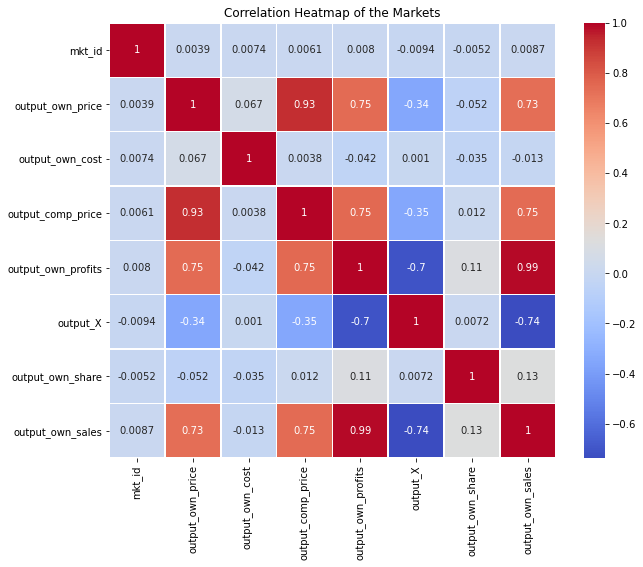

In [17]:
# Select the relevant features
selected_features = ['mkt_id', 'output_own_price', 'output_own_cost',
       'output_comp_price', 'output_own_profits', 'output_X',
       'output_own_share', 'output_own_sales']

# Create a correlation heatmap for selected features
correlation_matrix = df[selected_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of the Markets")
plt.show()

output_own_price and output_own_profits: Strong positive correlation (0.93): Indicates that as the firm's own price increases, the profits also tend to increase.

output_own_price and output_own_sales: Strong positive correlation (0.73): Suggests that higher own prices are associated with higher sales.

output_own_price and output_comp_price: High positive correlation (0.93): Indicates that the firm's own price is closely related to the competitor's price.

output_own_profits and output_own_sales: Strong positive correlation (0.99): Indicates a very strong relationship between profits and sales. This is expected, as higher sales generally lead to higher profits.

output_own_price and output_X: Moderate negative correlation (-0.34): Suggests that as the firm's own price increases, the market share (output_X) tends to decrease.

output_own_price and output_own_share: Weak negative correlation (-0.05): Indicates a slight tendency for a lower own price to be associated with a higher market share.

output_own_profits and output_X: Strong negative correlation (-0.70): Indicates a substantial negative relationship between profits and market share.

output_own_sales and output_own_share: Moderate positive correlation (0.13): Suggests a modest positive relationship between sales and market share.

It's important to note that correlation does not imply causation, and additional analyses are needed for a comprehensive understanding of the underlying relationships.

## TESTING FOR AND REMOVING TRENDS

### ROLLING STATISTICS METHOD

In [18]:
# Compute rolling mean and standard deviation
roll_mean = df.rolling(window=60).mean()
roll_std = df.rolling(window=60).std()

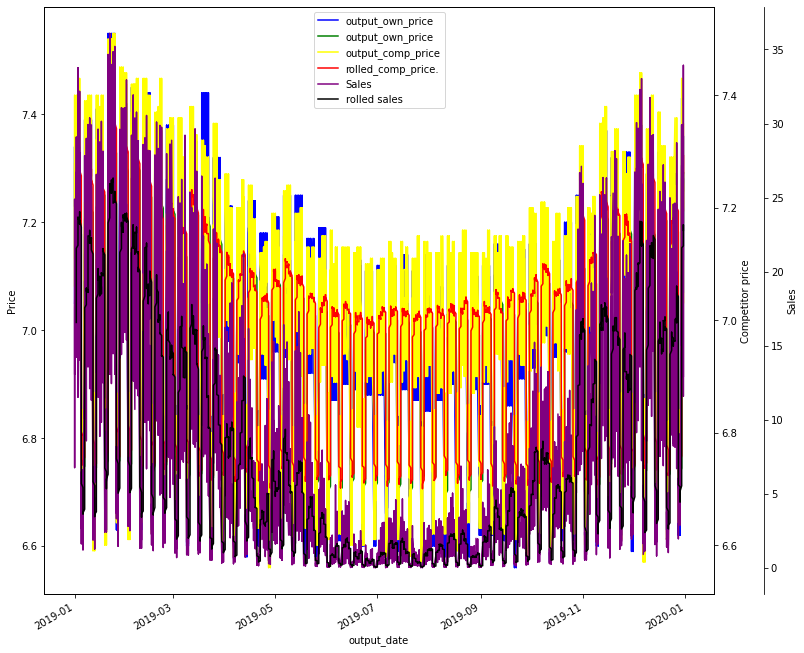

In [19]:
# Plot the rolling mean and original time series
fig, ax1 = plt.subplots(figsize=(12, 12))

# Plotting 'Price' on the first axis
# df[['Price']].plot(ax=ax1, color='blue', label='Price')
# roll_mean[['Price']].plot(ax=ax1, color='green', label='rolled_price')
# ax1.set_ylabel('Price')

df[['output_own_price']].plot(ax=ax1, color='blue', label='Price')
roll_mean[['output_own_price']].plot(ax=ax1, color='green', label='Rolled Price')
ax1.set_ylabel('Price')

# Create a second y-axis for 'Vol.'
ax2 = ax1.twinx()
df['output_comp_price'].plot(ax=ax2, color='yellow', label='output_comp_price')
roll_mean['output_comp_price'].plot(ax=ax2, color='red', label='rolled_comp_price.')
ax2.set_ylabel('Competitor price')

# Create a third y-axis for 'Change %'
ax3 = ax1.twinx()
df['output_own_sales'].plot(ax=ax3, color='purple', label='Sales')
roll_mean['output_own_sales'].plot(ax=ax3, color='black', label='rolled sales')
ax3.spines['right'].set_position(('outward', 50))  # Adjust position for 'Change %' axis
ax3.set_ylabel('Sales')

# Adjusting layout and legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines_3, labels_3 = ax3.get_legend_handles_labels()
lines = lines_1 + lines_2 + lines_3
labels = labels_1 + labels_2 + labels_3
ax1.legend(lines, labels, loc='upper center');

In [20]:
columns = ['mkt_id', 'output_X', 'output_own_share']
df.drop(columns, axis=1, inplace=True)

### ADFULLER TEST

In [21]:
from statsmodels.tsa.stattools import adfuller

dftest_price = adfuller(df['output_own_price'])
dftest_cost = adfuller(df['output_own_cost'])
dftest_comp_price = adfuller(df['output_comp_price'])
dftest_profits = adfuller(df['output_own_profits'])
dftest_sales = adfuller(df['output_own_sales'])

# Extract and display test results in a user friendly manner
for column, item in zip(df.columns, [dftest_price, dftest_cost, dftest_comp_price, dftest_profits, dftest_sales]):
    dfoutput = pd.Series(item[0:4], index=['Test Statistic', 'p-value',
                                           '#Lags Used', 'Number of Observations Used'])
    for key, value in item[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(f'Results of Dickey-Fuller test for {column}:')
    print(f'{dfoutput}\n')

Results of Dickey-Fuller test for output_own_price:
Test Statistic                -1.139869e+01
p-value                        7.743650e-21
#Lags Used                     2.800000e+01
Number of Observations Used    1.968100e+04
Critical Value (1%)           -3.430682e+00
Critical Value (5%)           -2.861687e+00
Critical Value (10%)          -2.566848e+00
dtype: float64

Results of Dickey-Fuller test for output_own_cost:
Test Statistic                  -139.377304
p-value                            0.000000
#Lags Used                         0.000000
Number of Observations Used    19709.000000
Critical Value (1%)               -3.430682
Critical Value (5%)               -2.861687
Critical Value (10%)              -2.566848
dtype: float64

Results of Dickey-Fuller test for output_comp_price:
Test Statistic                -1.106786e+01
p-value                        4.632700e-20
#Lags Used                     6.000000e+00
Number of Observations Used    1.970300e+04
Critical Value (1%) 

By applying a statistical significance level of 0.05, we can conclude that output_own_price (p-value=7.743650e-21), output_own_cost (p-value=0.000000), output_comp_price (4.632700e-20), output_own_profits (4.092165e-11), output_own_sales (93.957157e-10) are stationary.

In [22]:
# List of columns to drop
columns_to_drop = ['output_own_cost', 'output_comp_price', 'output_own_profits', 'output_own_sales', 'price_cost_margin', 'price_change_difference']
# create timeseries readable by prophet
ts = df.drop(columns = columns_to_drop).copy()
ts

,output_own_price
output_date,
2019-01-01,7.05
2019-01-01,7.29
2019-01-01,7.25
2019-01-01,7.25
2019-01-01,7.15
...,...
2019-12-31,7.19
2019-12-31,7.28
2019-12-31,7.22


In [23]:
# Calculate the index to split the data
train_size = ts.tail(110).index[0].strftime('%m/%d/%Y')

# Split data into train and test sets
train = ts[ts.index < train_size]
test = ts[ts.index >= train_size]

### PMDARIMA Model

In [24]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Using auto_arima to automatically select the best SARIMA model
model = auto_arima(train, m=12, seasonal=True, trace=True, 
                   error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-47556.009, Time=48.11 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-41674.454, Time=1.67 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-45888.292, Time=7.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-47563.383, Time=16.35 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-41676.453, Time=0.91 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-47562.094, Time=7.90 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-47561.429, Time=19.55 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=-47563.321, Time=81.56 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-47563.347, Time=19.38 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-47561.344, Time=72.47 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-41674.617, Time=6.82 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-47561.381, Time=24.86 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=-47561.428, Time=20.24 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-45888.41

In [25]:
#Summary of the Arima Model
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                19548
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood               23785.699
Date:                            Thu, 11 Jan 2024   AIC                         -47565.398
Time:                                    15:36:18   BIC                         -47541.756
Sample:                                         0   HQIC                        -47557.655
                                          - 19548                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5926      0.003   -177.452      0.000      -0.599      -0.586
ma.S.L12      -0.0131      0.007   

In [26]:
# Forecasting the same length as the test data
forecast_length = len(test)
predictions = model.predict(n_periods=forecast_length)

# Calculate MSE and RMSE
mse = mean_squared_error(test['output_own_price'], predictions)
rmse = np.sqrt(mse)

# Print MSE and RMSE
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 0.20245368506239722
Root Mean Squared Error (RMSE): 0.44994853601539503


This model has an order of (0, 1, 1), meaning it uses only an AR(1) and MA(1) component with no trend term. This suggests that the time series has short-term dependencies in both past values (autoregressive) and past errors (moving average).

### SARIMAX MODEL

In [27]:
# Fit SARIMA model with the best orders on train set
sarimax_model = SARIMAX(train)
sarima_fit = sarimax_model.fit()

C:\Users\Dennis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dennis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
# Display the summary of the model
print(sarima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       output_own_price   No. Observations:                19548
Model:               SARIMAX(1, 0, 0)   Log Likelihood               20836.230
Date:                Thu, 11 Jan 2024   AIC                         -41668.460
Time:                        15:36:30   BIC                         -41652.699
Sample:                             0   HQIC                        -41663.298
                              - 19548                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999   8.46e-05   1.18e+04      0.000       1.000       1.000
sigma2         0.0069   4.24e-05    163.548      0.000       0.007       0.007
Ljung-Box (L1) (Q):                3785.52   Jarque-

In [29]:
# Forecast for the specific number of days
forecast_days = len(test)

# Perform the forecast
sarimax_pred = sarima_fit.get_forecast(steps=forecast_days)

# Extract predicted values
predicted_values = sarimax_pred.predicted_mean

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['output_own_price'], predicted_values))
print("\n")
print(f"SARIMA Model RMSE: {rmse}")

C:\Users\Dennis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dennis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(




SARIMA Model RMSE: 0.5646550522753965


### FACEBOOK PROPHET

In [30]:
# create timeseries readable by prophet
ts.reset_index(inplace=True)
ts.rename(columns={'output_date':'ds', 'output_own_price':'y'}, inplace=True)
ts['y'] = np.log(ts['y'])
ts

,ds,y
0,2019-01-01,1.953028
1,2019-01-01,1.986504
2,2019-01-01,1.981001
3,2019-01-01,1.981001
4,2019-01-01,1.967112
...,...,...
19705,2019-12-31,1.972691
19706,2019-12-31,1.985131
19707,2019-12-31,1.976855
19708,2019-12-31,1.958685


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Base Prophet Model')

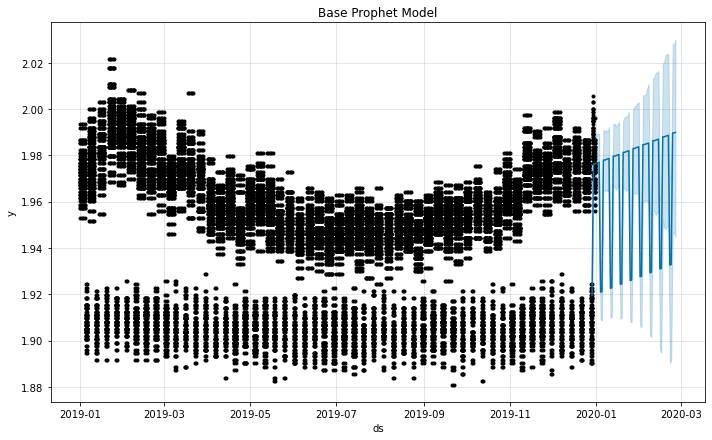

In [31]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

# Find the last date in the training data
last_date = train.index[-1]

# Increment the last date by one day to get the start date for forecasting
start_date = last_date + pd.DateOffset(days=1)

# Instantiate the model and fit the timeseries
base_prophet = Prophet()
base_prophet.fit(ts)

# Create a DataFrame with future dates starting from the next day
base_future = pd.DataFrame({'ds': pd.date_range(start=start_date, periods=60)})  # 60 days = 8 weeks
base_forecast = base_prophet.predict(base_future)

# Display the most critical output columns from the forecast
base_forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# Plot
fig = base_prophet.plot(base_forecast)
plt.title('Base Prophet Model')

In [32]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

# Perform cross-validation
cv_results = cross_validation(base_prophet, initial='300 days', period='180 days', horizon='30 days')

# Display performance metrics
performance_metrics_results = performance_metrics(cv_results)
print(performance_metrics_results.head())

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-12-01 00:00:00 and 2019-12-01 00:00:00



  horizon       mse      rmse       mae      mape     mdape  coverage
0  3 days  0.000215  0.014653  0.012642  0.006362  0.005653  0.543210
1  4 days  0.000208  0.014435  0.012425  0.006253  0.005584  0.555556
2  5 days  0.000203  0.014233  0.012221  0.006150  0.005439  0.567901
3  6 days  0.000191  0.013835  0.011757  0.006000  0.005479  0.574074
4  7 days  0.000184  0.013560  0.011429  0.005918  0.005680  0.567901


The RMSE (Root Mean Squared Error) values are relatively low, ranging from 0.013560 to 0.014653 for horizons of 3 to 7 days.

This suggests that the model is generally able to capture the patterns in the data and make reasonably accurate forecasts within these horizons.

The MAPE (Mean Absolute Percentage Error) values are also fairly low, between 0.55% and 0.63%, indicating that the errors are relatively small compared to the overall scale of the data.

The coverage values are around 55-56%, which means that the actual values fell within the 80% prediction intervals about 55-56% of the time. This suggests that the model's uncertainty estimates are somewhat conservative.

In [33]:
# Concantinate the predicted and the training values
merged_df = pd.merge(ts, base_forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
merged_df = merged_df[['ds','yhat_lower','yhat_upper','yhat','y']]

# Calculate MSE between observed and predicted values 
y_actual = merged_df['y'].values
y_prediction = merged_df['yhat'].values
base_prophet_score = mean_squared_error(y_actual, y_prediction)
base_prophet_score

# Calculate RMSE from MSE
base_prophet_rmse = np.sqrt(base_prophet_score)

# Print the result
print(f'Root Mean Squared Error (RMSE): {base_prophet_rmse}')

Root Mean Squared Error (RMSE): 0.013119671746320132


### Tuning Facebook Prophet Model

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Tuned Prophet Model')

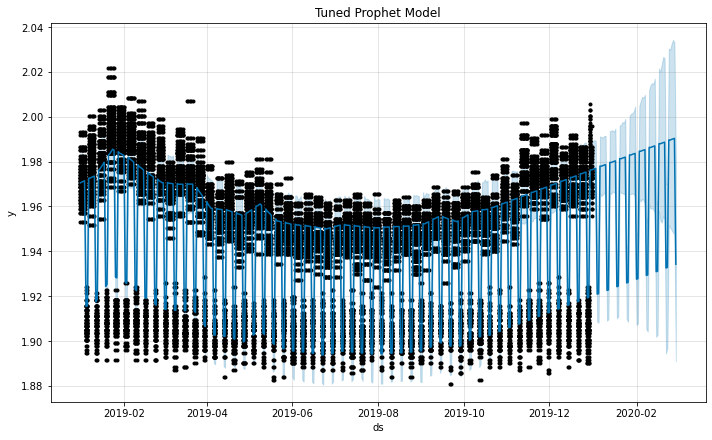

In [34]:
# Initialize a Prophet model with specific parameters for tuning
tuned_prophet = Prophet()

# Fit the Prophet model using the time series data
tuned_prophet.fit(ts)
# Create a DataFrame with future dates starting from the next day
#future = pd.DataFrame({'ds': pd.date_range(start=start_date, periods=60)})  # 60 days = 8 weeks
# Create a dataframe for future predictions
tuned_future = tuned_prophet.make_future_dataframe(periods=60)

# Generate predictions for the future time periods
tuned_forecast = tuned_prophet.predict(tuned_future)

# Plot the forecasted values along with the historical data
fig = tuned_prophet.plot(tuned_forecast)
plt.title('Tuned Prophet Model')  # Set the title for the plot

In [35]:
# Concantinate the predicted and the training values
tuned_df = pd.merge(ts, tuned_forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
tuned_df = tuned_df[['ds','yhat_lower','yhat_upper','yhat','y']]

# Calculate MSE between observed and predicted values 
y_true = tuned_df['y'].values
y_pred = tuned_df['yhat'].values
tuned_prophet_score = mean_squared_error(y_true, y_pred)
tuned_prophet_score

# Calculate RMSE from MSE
tuned_prophet_rmse = np.sqrt(tuned_prophet_score)

# Print the result
print(f'Root Mean Squared Error (RMSE): {tuned_prophet_rmse}')

Root Mean Squared Error (RMSE): 0.00984850782912789


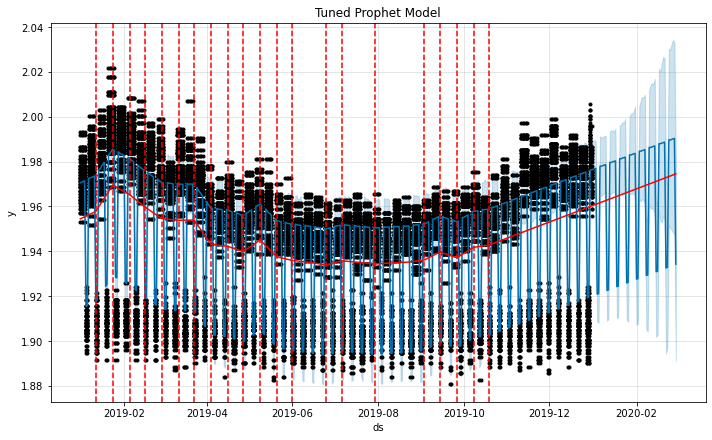

In [36]:
# Plot changepoints
a = add_changepoints_to_plot(fig.gca(),tuned_prophet,tuned_forecast)
fig

In [37]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((np.asarray(y_true) - y_pred)**2))

# Get the RMSE for each model
rmse_arima = root_mean_squared_error(test['output_own_price'], predictions)
rmse_sarimax = root_mean_squared_error(test['output_own_price'], predicted_values)
rmse_base_prophet = root_mean_squared_error(y_actual, y_prediction)
rmse_tuned_prophet = root_mean_squared_error(y_true, y_pred)

# Store RMSE values in a dictionary
rmse_dict = {
    "arima": rmse_arima,
    "sarimax": rmse_sarimax,
    "base_prophet_rmse": rmse_base_prophet,
    "tuned_prophet_rmse": rmse_tuned_prophet
}
# Sort the RMSE dictionary by values in ascending order
sorted_rmse = dict(sorted(rmse_dict.items(), key=lambda item: item[1]))

# Convert sorted RMSE dictionary to a DataFrame
rmse_table = pd.DataFrame(sorted_rmse.items(), columns=['Model', 'RMSE'])
rmse_table

,Model,RMSE
0,tuned_prophet_rmse,0.009849
1,base_prophet_rmse,0.013120
2,arima,0.449949
3,sarimax,0.564655


From the table illustrating the three models sorted by MSE, the Tuned Prophet model emerges as the best model having the lowest RMSE. This outcome implies that the Tuned Prophet model offers superior predictive capability compared to the other models.

### Forecasting Future Prices

In [38]:
# Predicting 
future_preds = tuned_prophet.predict(tuned_future)

# Rescaling the values
future_preds['yhat'] = np.exp(future_preds['yhat']) * 100

future_preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,1.954481,1.958350,1.983160,1.954481,1.954481,0.016040,0.016040,0.016040,0.016040,0.016040,0.016040,0.0,0.0,0.0,717.441155
1,2019-01-02,1.954784,1.957574,1.983955,1.954784,1.954784,0.016083,0.016083,0.016083,0.016083,0.016083,0.016083,0.0,0.0,0.0,717.689435
2,2019-01-03,1.955087,1.958477,1.983538,1.955087,1.955087,0.016058,0.016058,0.016058,0.016058,0.016058,0.016058,0.0,0.0,0.0,717.889578
3,2019-01-04,1.955391,1.959932,1.983892,1.955391,1.955391,0.016045,0.016045,0.016045,0.016045,0.016045,0.016045,0.0,0.0,0.0,718.097930
4,2019-01-05,1.955694,1.902081,1.927817,1.955694,1.955694,-0.040272,-0.040272,-0.040272,-0.040272,-0.040272,-0.040272,0.0,0.0,0.0,678.980589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2020-02-25,1.973575,1.949570,2.033830,1.934187,2.015280,0.016040,0.016040,0.016040,0.016040,0.016040,0.016040,0.0,0.0,0.0,731.271711
421,2020-02-26,1.973813,1.947595,2.033150,1.933424,2.016694,0.016083,0.016083,0.016083,0.016083,0.016083,0.016083,0.0,0.0,0.0,731.477300
422,2020-02-27,1.974052,1.948756,2.037333,1.932503,2.018241,0.016058,0.016058,0.016058,0.016058,0.016058,0.016058,0.0,0.0,0.0,731.633799
423,2020-02-28,1.974290,1.948009,2.037007,1.931272,2.019830,0.016045,0.016045,0.016045,0.016045,0.016045,0.016045,0.0,0.0,0.0,731.798642


In [39]:
# Convert 'ds' column to datetime format
future_preds['ds'] = pd.to_datetime(future_preds['ds'])

future_preds[['ds', 'yhat']]

,ds,yhat
0,2019-01-01,717.441155
1,2019-01-02,717.689435
2,2019-01-03,717.889578
3,2019-01-04,718.097930
4,2019-01-05,678.980589
...,...,...
420,2020-02-25,731.271711
421,2020-02-26,731.477300
422,2020-02-27,731.633799
423,2020-02-28,731.798642


In [40]:
# Convert 'ds' column to datetime format
future_preds['ds'] = pd.to_datetime(future_preds['ds'])

# Set 'ds' column as the index and rename 'yhat' to 'price_predictions'
future_preds.set_index('ds', inplace=True)
future_preds.rename(columns={'yhat': 'price_predictions'}, inplace=True)

# Displaying the updated DataFrame
future_preds[['price_predictions']]

,price_predictions
ds,
2019-01-01,717.441155
2019-01-02,717.689435
2019-01-03,717.889578
2019-01-04,718.097930
2019-01-05,678.980589
...,...
2020-02-25,731.271711
2020-02-26,731.477300
2020-02-27,731.633799


In [43]:
# Concat the original data and the forecast data
data = pd.concat([df, future_preds])
data.rename(columns={0:'future_predictions'},inplace=True)

In [45]:
data[['output_own_price', 'price_predictions']]

,output_own_price,price_predictions
2019-01-01,7.05,NaN
2019-01-01,7.29,NaN
2019-01-01,7.25,NaN
2019-01-01,7.25,NaN
2019-01-01,7.15,NaN
...,...,...
2020-02-25,NaN,731.271711
2020-02-26,NaN,731.477300
2020-02-27,NaN,731.633799
2020-02-28,NaN,731.798642
